In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.lib import recfunctions
from scipy import constants
plt.rcParams['font.family'] = 'DejaVu Sans'

In [2]:
def freq_to_mass(f0):
    hbar = constants.hbar        # Planck's constant over 2π, in J·s
    ev = constants.electron_volt # 1 eV in joules
    m = f0 * hbar * 2 * np.pi / ev
    return m

def mass_to_freq(m):
    hbar = constants.hbar        # Planck's constant over 2π, in J·s
    ev = constants.electron_volt # 1 eV in joules
    f0 = m * ev/(hbar * 2 * np.pi) 
    return f0

In [3]:
UL = {}
# frequency (Hz)  mass (eV)       h0      lambda_inv (1/GeV)      epsilon alpha
UL['BSD']=np.genfromtxt('O4a_BSD.txt', skip_header=1, names=['f', 'Mass', 'h0', 'Lambda_inv', 'epsilon', 'alpha'])
# frequency (Hz) Dilaton lambda_inv (1/GeV) DPDM epsilon Tensor alpha
UL['CrossCorrelation']=np.genfromtxt('O4a_CrossCorrelation.txt', skip_header=1, names=['f', 'Lambda_inv', 'epsilon', 'alpha'])
# mass (ev)      frequency (Hz)      LambdaInv (1/GeV)      epsilon      alpha
UL['LPSD']=np.genfromtxt('O4a_LPSD.txt', skip_header=1, names=['Mass', 'f', 'Lambda_inv', 'epsilon', 'alpha'])

In [4]:
UL['CrossCorrelation'] = recfunctions.append_fields(UL['CrossCorrelation'], 'Mass', freq_to_mass(UL['CrossCorrelation']['f']))

In [5]:
# mass range for plot
xmin = 4e-14
xmax = 1e-11
f0_ticks_major =  10**np.arange(np.ceil(np.log10(mass_to_freq(xmin))), np.floor(np.log10(mass_to_freq(xmax)))+1)
f0_tick_labels = [r"$10^{" + str(int(np.log10(x))) +"}$" for x in f0_ticks_major]

<h3>Scalar</h3>

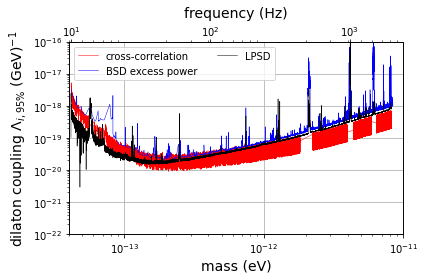

In [6]:
import glob
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_xlim(xmin, xmax)
ax.grid(True)

ax.loglog(UL['CrossCorrelation']['Mass'],  UL['CrossCorrelation']['Lambda_inv'],  'r-',label='cross-correlation',linewidth=0.5)
ax.loglog(UL['BSD']['Mass'],               UL['BSD']['Lambda_inv'],               'b-',label='BSD excess power',linewidth=0.5)
ax.loglog(UL['LPSD']['Mass'],              UL['LPSD']['Lambda_inv'],              'k-',label='LPSD',linewidth=0.5)
ax.set_ylim([1e-22,1e-16])

# Top axis: frequency
ax_top = ax.twiny()
ax_top.xaxis.tick_top()
ax_top.set_xscale('log')
ax_top.set_xlim(ax.get_xlim())

ax_top.set_xticks(freq_to_mass(f0_ticks_major)) ## set frequency tick mark at proper mass (bottom x-axis) location
ax_top.set_xticklabels(f0_tick_labels) ## sets the tick labels for the major ticks
ax_top.xaxis.set_tick_params(pad=0)

#ax_top.set_xticks(dm_calc_m(f0_ticks_minor),minor=True) ## set freq tick mark at proper mass (bottom x-axis) location
#ax_top.set_xticklabels([],minor=True) ## no labels for minor ticks

# plt.grid(True)
ax.set_xlabel('mass (eV)',size=14)
ax.set_ylabel(r'dilaton coupling $\Lambda_{i,95\%}$ (GeV)$^{-1}$',size=14)
ax_top.set_xlabel(r'frequency (Hz)', labelpad=7,size=14)

ax.legend(loc='upper left',ncol=2)#,prop = { "size": 6 })
plt.tight_layout()
fig.tight_layout() 

<h3> Dark photon dark matter</h3>

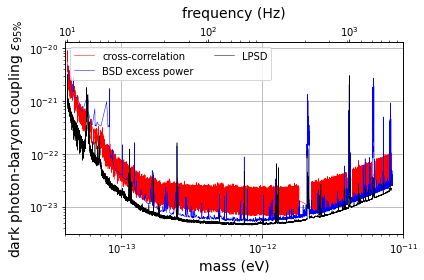

In [7]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_xlim(xmin, xmax)
ax.grid(True)


ax.loglog(UL['CrossCorrelation']['Mass'],  UL['CrossCorrelation']['epsilon'],  'r-',label='cross-correlation',linewidth=0.5)
ax.loglog(UL['BSD']['Mass'],               UL['BSD']['epsilon'],               'b-',label='BSD excess power',linewidth=0.5)
ax.loglog(UL['LPSD']['Mass'],              UL['LPSD']['epsilon'],              'k-',label='LPSD',linewidth=0.5)

# Top axis: frequency
ax_top = ax.twiny()
ax_top.xaxis.tick_top()
ax_top.set_xscale('log')
ax_top.set_xlim(ax.get_xlim())

ax_top.set_xticks(freq_to_mass(f0_ticks_major)) ## set frequency tick mark at proper mass (bottom x-axis) location
ax_top.set_xticklabels(f0_tick_labels) ## sets the tick labels for the major ticks
ax_top.xaxis.set_tick_params(pad=0)

#ax_top.set_xticks(dm_calc_m(f0_ticks_minor),minor=True) ## set freq tick mark at proper mass (bottom x-axis) location
#ax_top.set_xticklabels([],minor=True) ## no labels for minor ticks

# plt.grid(True)
ax.set_xlabel('mass (eV)',size=14)
ax.set_ylabel(r'dark photon-baryon coupling $\epsilon_{95\%}$',size=14)
ax_top.set_xlabel(r'frequency (Hz)', labelpad=7,size=14)

ax.legend(loc='upper left',ncol=2)#,prop = { "size": 6 })
plt.tight_layout()
fig.tight_layout() 

<h3>Tensor</h3>

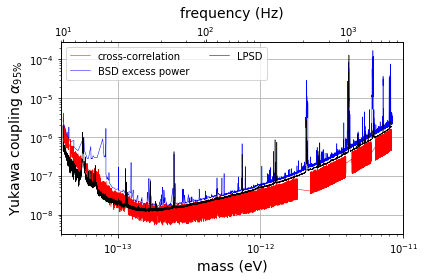

In [8]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_xlim(xmin, xmax)
ax.grid(True)


ax.loglog(UL['CrossCorrelation']['Mass'],  UL['CrossCorrelation']['alpha'],  'r-',label='cross-correlation',linewidth=0.5)
ax.loglog(UL['BSD']['Mass'],               UL['BSD']['alpha'],               'b-',label='BSD excess power',linewidth=0.5)
ax.loglog(UL['LPSD']['Mass'],              UL['LPSD']['alpha'],              'k-',label='LPSD',linewidth=0.5)

# Top axis: frequency
ax_top = ax.twiny()
ax_top.xaxis.tick_top()
ax_top.set_xscale('log')
ax_top.set_xlim(ax.get_xlim())

ax_top.set_xticks(freq_to_mass(f0_ticks_major)) ## set frequency tick mark at proper mass (bottom x-axis) location
ax_top.set_xticklabels(f0_tick_labels) ## sets the tick labels for the major ticks
ax_top.xaxis.set_tick_params(pad=0)

#ax_top.set_xticks(dm_calc_m(f0_ticks_minor),minor=True) ## set freq tick mark at proper mass (bottom x-axis) location
#ax_top.set_xticklabels([],minor=True) ## no labels for minor ticks

# plt.grid(True)
ax.set_xlabel('mass (eV)',size=14)
ax.set_ylabel(r'Yukawa coupling $\alpha_{95\%}$',size=14)
ax_top.set_xlabel(r'frequency (Hz)', labelpad=7,size=14)

ax.legend(loc='upper left',ncol=2)#,prop = { "size": 6 })
plt.tight_layout()
fig.tight_layout() 